In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
nba_hurt = pd.read_csv('nba_hurt2.csv')
nba_hurt.head()
nba_hurt = nba_hurt.drop([0], axis = 0)
nba_hurt.dropna(how = "any")

,Unnamed: 0,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
1,0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,9-Jun,258.0,1981-11-20,Duke University,False,False,True,False,Arm Fracture,7666
2,1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,9-Jun,240.0,1987-04-29,Arizona State University,False,False,False,False,No Index,No Index
3,2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,11-Jun,245.0,1980-05-02,University of Notre Dame,True,False,False,False,Strain/Sprain,3175
4,3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,7-Jun,210.0,1987-09-29,University of New Mexico,False,False,False,False,No Index,No Index
5,4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,11-Jun,255.0,1981-05-10,Seton Hall University,True,False,False,False,Strain/Sprain,3175
6,5,2010-10-17,Bobcats,Dominic McGuire,stress fracture in left shin (out indefinitely),2008.0,2013.0,F,9-Jun,220.0,1985-10-20,"California State University, Fresno",False,False,False,False,No Index,No Index
7,6,2010-10-18,Warriors,Lou Amundson,surgery to repair fractured right index finger...,2007.0,2016.0,F,9-Jun,220.0,1982-12-07,"University of Nevada, Las Vegas",False,False,True,False,Arm Fracture,7666
8,7,2010-10-19,Suns,Josh Childress,fractured right index finger (out indefinitely),2005.0,2014.0,G-F,8-Jun,210.0,1983-06-20,Stanford University,False,False,True,False,Arm Fracture,7666
9,8,2010-10-22,Heat,Mike Miller,surgery on right hand to repair a broken thumb...,2001.0,2017.0,F-G,8-Jun,218.0,1980-02-19,University of Florida,False,False,False,False,No Index,No Index
10,9,2010-10-25,Thunder,Nick Collison,left knee injury (out indefinitely),2005.0,2018.0,F,10-Jun,255.0,1980-10-26,University of Kansas,False,False,False,False,No Index,No Index


In [59]:
age = nba_hurt["birth_date"].str.split("-", n = 2, expand = True)
date= nba_hurt["Date"].str.split('-', n = 2, expand = True)
age = age[0]
date= date[0]

In [60]:
age = pd.to_numeric(age)
date = pd.to_numeric(date)

In [62]:
date2 = date.iloc[1:12432]
age2 = age.iloc[1:12432]

In [63]:
nba_hurt["Injury Age"] = date2 - age2

In [64]:
age_bins = [0, 20.90, 24.90, 29.90, 34.90, 39.90, 44.90, 49.90, 99999]
group_names = ["<21", "21-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50+"]

nba_hurt["Age Group"] = pd.cut(nba_hurt["Injury Age"], age_bins, labels =group_names)

age2 

## 

In [67]:
inj_age_df = nba_hurt.groupby(["Injury Age"])
inj_age_count = inj_age_df["Injury Age"].count()
inj_age_count

Injury Age
19.0      62
20.0     198
21.0     328
22.0     584
23.0     854
24.0    1034
25.0    1024
26.0    1216
27.0    1152
28.0    1150
29.0    1003
30.0     802
31.0     590
32.0     608
33.0     496
34.0     380
35.0     242
36.0     172
37.0     108
38.0     114
39.0     118
40.0      84
41.0       4
42.0       2
47.0       6
48.0      18
50.0       2
52.0      10
68.0       4
70.0      18
71.0      16
72.0      20
73.0       2
74.0       4
75.0       4
Name: Injury Age, dtype: int64

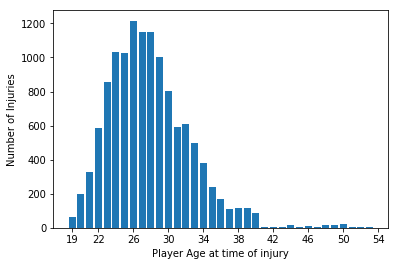

In [92]:
x_axis = np.arange(0,len(inj_age_count),1)
plt.bar(x_axis,inj_age_count, label="Age of Player ", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at time of injury")
plt.ylabel("Number of Injuries")
plt.savefig("Injuries_Age.png")

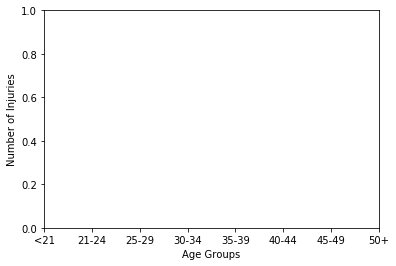